In [1]:
import numpy as np
rng = np.random.default_rng(42)
from seaborn import heatmap

TODO: implement this: https://stackoverflow.com/questions/55818845/fast-vectorized-multinomial-in-python

In [2]:
interaction = np.array([[1,0.1],[0.1,1]])

In [3]:
interaction

array([[1. , 0.1],
       [0.1, 1. ]])

In [4]:
D = 100000

In [5]:
exponentials = rng.exponential(scale=1, size=(2,D))
dirichlet = exponentials / np.sum(exponentials, axis=0)

In [6]:
interaction_exponentials = np.exp(interaction.T @ exponentials)
interaction_dirichlet = interaction_exponentials / np.sum(interaction_exponentials, axis=0)

assume we have N=2 cells in each droplet because whatever that is simpler for now

In [7]:
dirichlet_multinomial = np.zeros((2, D))
for d in range(D):
    dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=dirichlet[:,d])

In [8]:
interaction_dirichlet_multinomial = np.zeros((2, D))
for d in range(D):
    interaction_dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=interaction_dirichlet[:,d])

In [9]:
dm_nonzero = dirichlet_multinomial > 0
idm_nonzero = interaction_dirichlet_multinomial > 0

In [10]:
dm_cooccurrence = np.zeros((2,2))
dm_cooccurrence[1,1] = np.sum(~dm_nonzero[0,:] & dm_nonzero[1,:])
dm_cooccurrence[0,1] = np.sum(dm_nonzero[0,:] & dm_nonzero[1,:])
dm_cooccurrence[0,0] = np.sum(dm_nonzero[0,:] & ~dm_nonzero[1,:])
dm_cooccurrence /= np.sum(dm_cooccurrence)

In [11]:
dm_cooccurrence

array([[0.33513, 0.3336 ],
       [0.     , 0.33127]])

In [12]:
mask = ~np.triu(np.ones_like(dm_cooccurrence, dtype=bool))

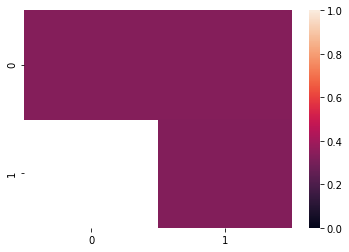

In [13]:
heatmap(dm_cooccurrence, mask=mask, vmin=0., vmax=1.)

In [14]:
idm_cooccurrence = np.zeros((2,2))
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:])
idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:])
idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:])
idm_cooccurrence /= np.sum(idm_cooccurrence)

In [15]:
idm_cooccurrence

array([[0.29873, 0.39998],
       [0.     , 0.30129]])

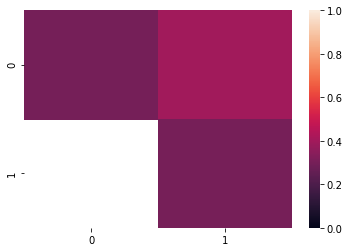

In [16]:
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Stronger Positive Interaction

In [17]:
interaction = np.array([[1,0.25],[0.25,1]])
interaction

array([[1.  , 0.25],
       [0.25, 1.  ]])

In [18]:
interaction_exponentials = np.exp(interaction.T @ exponentials)
interaction_dirichlet = interaction_exponentials / np.sum(interaction_exponentials, axis=0)

interaction_dirichlet_multinomial = np.zeros((2, D))
for d in range(D):
    interaction_dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=interaction_dirichlet[:,d])
    
idm_nonzero = interaction_dirichlet_multinomial > 0

idm_cooccurrence = np.zeros((2,2))
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:])
idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:])
idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:])
idm_cooccurrence /= np.sum(idm_cooccurrence)

In [19]:
idm_cooccurrence

array([[0.29014, 0.41754],
       [0.     , 0.29232]])

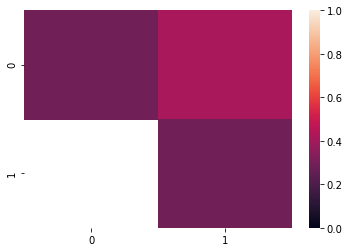

In [20]:
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Crank up the mutualism further

In [21]:
interaction = np.array([[1,0.5],[0.5,1]])
interaction

array([[1. , 0.5],
       [0.5, 1. ]])

In [22]:
interaction_exponentials = np.exp(interaction.T @ exponentials)
interaction_dirichlet = interaction_exponentials / np.sum(interaction_exponentials, axis=0)

interaction_dirichlet_multinomial = np.zeros((2, D))
for d in range(D):
    interaction_dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=interaction_dirichlet[:,d])
    
idm_nonzero = interaction_dirichlet_multinomial > 0

idm_cooccurrence = np.zeros((2,2))
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:])
idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:])
idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:])
idm_cooccurrence /= np.sum(idm_cooccurrence)

In [23]:
idm_cooccurrence

array([[0.2703 , 0.45779],
       [0.     , 0.27191]])

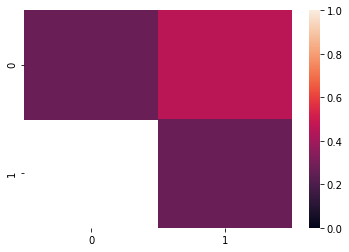

In [24]:
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Now at ridiculously high level

In [25]:
interaction = np.array([[1,1],[1,1]])
interaction

array([[1, 1],
       [1, 1]])

In [26]:
interaction_exponentials = np.exp(interaction.T @ exponentials)
interaction_dirichlet = interaction_exponentials / np.sum(interaction_exponentials, axis=0)

interaction_dirichlet_multinomial = np.zeros((2, D))
for d in range(D):
    interaction_dirichlet_multinomial[:,d] = rng.multinomial(n=2, pvals=interaction_dirichlet[:,d])
    
idm_nonzero = interaction_dirichlet_multinomial > 0

idm_cooccurrence = np.zeros((2,2))
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:])
idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:])
idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:])
idm_cooccurrence /= np.sum(idm_cooccurrence)

In [27]:
idm_cooccurrence

array([[0.25111, 0.49896],
       [0.     , 0.24993]])

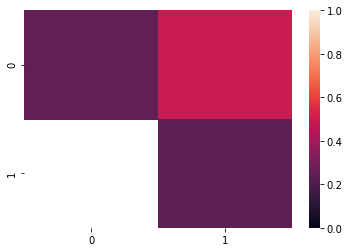

In [28]:
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)